# **Model Evaluation**

In [1]:
import os
os.chdir("../src")

In [2]:
import utils
import models

2022-07-22 13:53:18.557158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 13:53:18.557187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


[2022-07-22 13:53:19,410][__init__.py - line 36] - INFO - You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
/home/leon/causal-relationships/.env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2022-07-22 13:53:19,710][__init__.py - line 31] - INFO - You are using ``pytorch`` as the backend.
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
path_to_results = "../out/grid-search/"
results = utils.get_files(path_to_results)
{model: results[model] for model in sorted(results)}

{'boosting.json': '../out/grid-search/boosting.json',
 'castle.json': '../out/grid-search/castle.json',
 'causal-selection_ges-boosting.json': '../out/grid-search/causal-selection_ges-boosting.json',
 'causal-selection_ges-decision-tree.json': '../out/grid-search/causal-selection_ges-decision-tree.json',
 'causal-selection_ges-logistic-regression.json': '../out/grid-search/causal-selection_ges-logistic-regression.json',
 'causal-selection_lingam-boosting.json': '../out/grid-search/causal-selection_lingam-boosting.json',
 'causal-selection_lingam-decision-tree.json': '../out/grid-search/causal-selection_lingam-decision-tree.json',
 'causal-selection_lingam-logistic-regression.json': '../out/grid-search/causal-selection_lingam-logistic-regression.json',
 'causal-selection_notears-boosting.json': '../out/grid-search/causal-selection_notears-boosting.json',
 'causal-selection_notears-decision-tree.json': '../out/grid-search/causal-selection_notears-decision-tree.json',
 'causal-selection_n

## Performance

In [5]:
test_scores = {}
train_scores = {}
names = [
    "boosting", 
    "decision-tree",
    "logistic-regression",
    "feature-selection_correlation-boosting",
    "feature-selection_correlation-decision-tree",
    "feature-selection_correlation-logistic-regression",
    "feature-selection_ols-boosting",
    "feature-selection_ols-decision-tree",
    "feature-selection_ols-logistic-regression",
    "feature-selection_rfe-boosting",
    "feature-selection_rfe-decision-tree",
    "feature-selection_rfe-logistic-regression",
    "feature-selection_sfs-boosting",
    "feature-selection_sfs-decision-tree",
    "feature-selection_sfs-logistic-regression",
    "causal-selection_pc-boosting", 
    "causal-selection_pc-decision-tree",
    "causal-selection_pc-logistic-regression",
    "causal-selection_ges-boosting", 
    "causal-selection_ges-decision-tree",
    "causal-selection_ges-logistic-regression",
    "causal-selection_lingam-boosting", 
    "causal-selection_lingam-decision-tree",
    "causal-selection_lingam-logistic-regression",
    "causal-selection_notears-boosting", 
    "causal-selection_notears-decision-tree",
    "causal-selection_notears-logistic-regression",
    "castle"
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-decision-tree.json.
finished loading results from ../out/grid-s

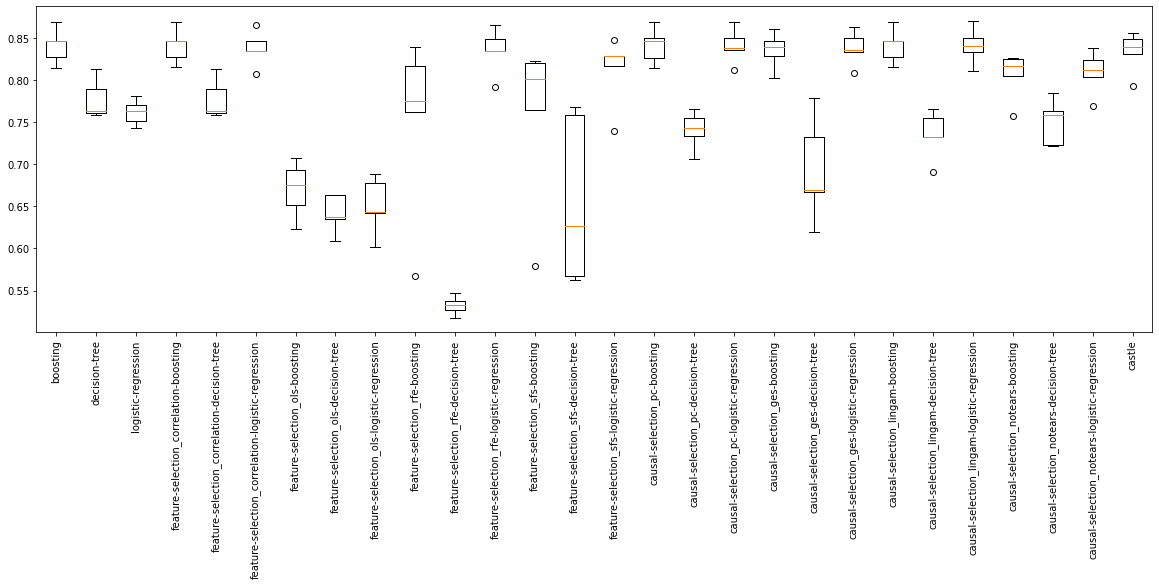

In [6]:
plt.figure(figsize=(20, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

In [7]:
test_scores = {}
train_scores = {}
names = [
    "boosting", 
    "decision-tree",
    "logistic-regression",
    "feature-selection_correlation-boosting",
    "feature-selection_correlation-decision-tree",
    "feature-selection_correlation-logistic-regression",
    "feature-selection_ols-boosting",
    "feature-selection_ols-decision-tree",
    "feature-selection_ols-logistic-regression",
    "feature-selection_rfe-boosting",
    "feature-selection_rfe-decision-tree",
    "feature-selection_rfe-logistic-regression",
    "feature-selection_sfs-boosting",
    "feature-selection_sfs-decision-tree",
    "feature-selection_sfs-logistic-regression",
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-decision-tree.json.
finished loading results from ../out/grid-s

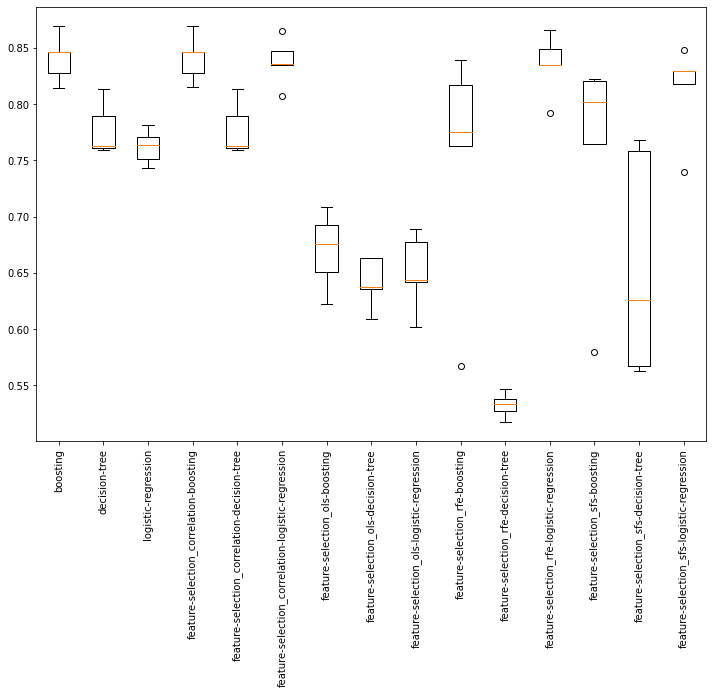

In [8]:
plt.figure(figsize=(12, 8));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

In [9]:
names = ["feature-selection_correlation-boosting",
    "feature-selection_correlation-decision-tree",
    "feature-selection_correlation-logistic-regression",
    "feature-selection_ols-boosting",
    "feature-selection_ols-decision-tree",
    "feature-selection_ols-logistic-regression",
    "feature-selection_rfe-boosting",
    "feature-selection_rfe-decision-tree",
    "feature-selection_rfe-logistic-regression",
    "feature-selection_sfs-boosting",
    "feature-selection_sfs-decision-tree",
    "feature-selection_sfs-logistic-regression",
]

[name for name in names if "boosting" in name]

['feature-selection_correlation-boosting',
 'feature-selection_ols-boosting',
 'feature-selection_rfe-boosting',
 'feature-selection_sfs-boosting']

### Boosting

In [10]:
predictive_model = "boosting"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"feature-selection_correlation-{predictive_model}",
    f"feature-selection_ols-{predictive_model}",
    f"feature-selection_rfe-{predictive_model}",
    f"feature-selection_sfs-{predictive_model}",
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.
finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.
finished loading results from ../out/grid-search/causal-selection_notears-boosting.json.
finished loading results from ../out/grid-search/castle.json.


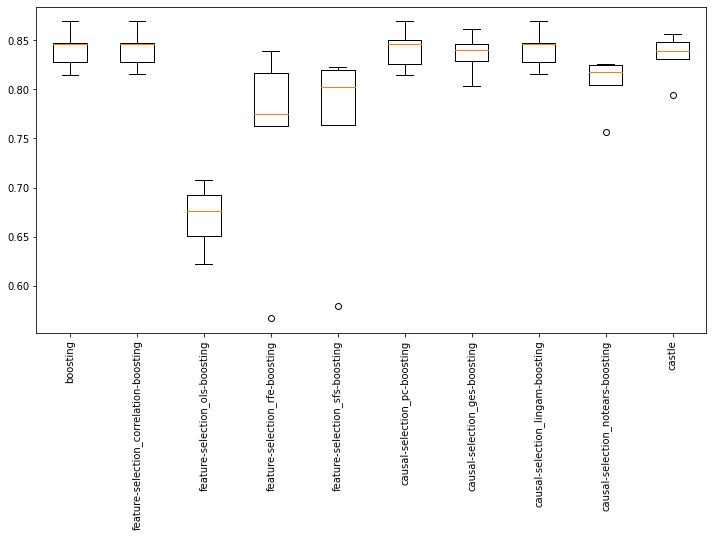

In [11]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.savefig("../out/img/performance-boosting.png", bbox_inches='tight')
plt.show()

### Logistic Regression

In [12]:
predictive_model = "logistic-regression"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"feature-selection_correlation-{predictive_model}",
    f"feature-selection_ols-{predictive_model}",
    f"feature-selection_rfe-{predictive_model}",
    f"feature-selection_sfs-{predictive_model}",
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_ges-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_lingam-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_notears-logistic-regression.json.
finished loading results from ../out/grid-search/castle.json.


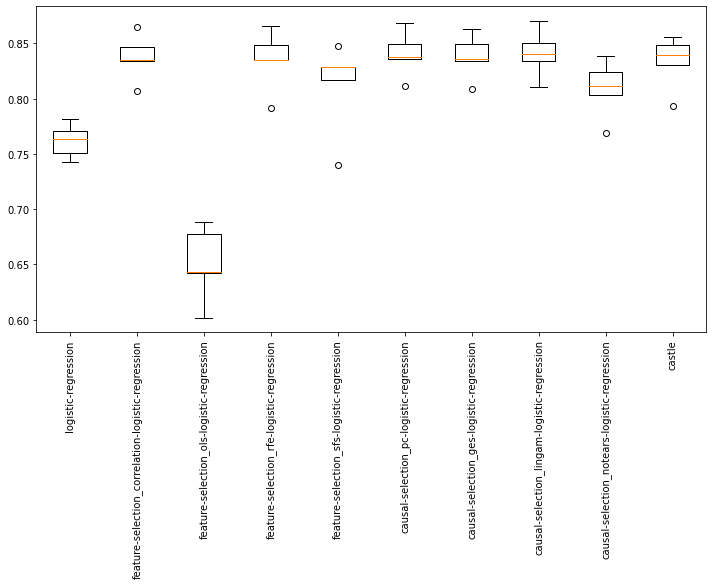

In [13]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.savefig("../out/img/performance-logistic-regression.png", bbox_inches='tight')
plt.show()

### Decision Tree

In [14]:
predictive_model = "decision-tree"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"feature-selection_correlation-{predictive_model}",
    f"feature-selection_ols-{predictive_model}",
    f"feature-selection_rfe-{predictive_model}",
    f"feature-selection_sfs-{predictive_model}",
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_correlation-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_ols-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_rfe-decision-tree.json.
finished loading results from ../out/grid-search/feature-selection_sfs-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_ges-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_lingam-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_notears-decision-tree.json.
finished loading results from ../out/grid-search/castle.json.


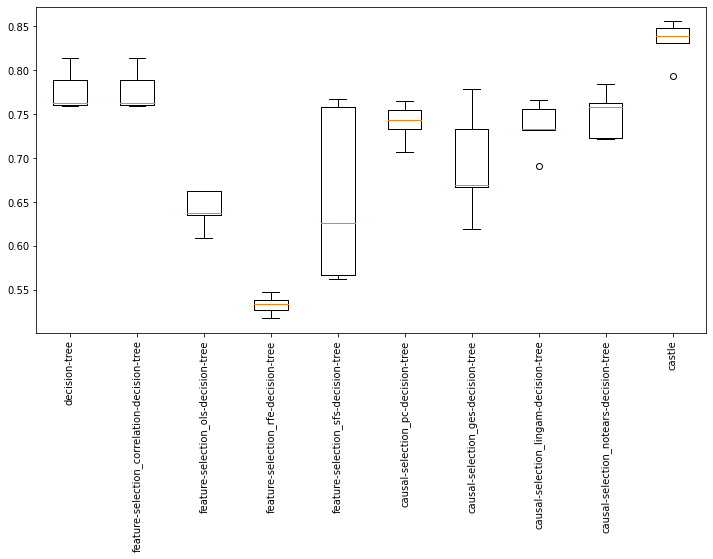

In [15]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.savefig("../out/img/performance-decision-tree.png", bbox_inches='tight')
plt.show()

### PC

In [16]:
causal_model = "pc"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
selection_models = ["correlation", "ols", "rfe", "sfs"]
selection_models = [[f"feature-selection_{selection_model}-{predictive_model}" for selection_model in selection_models] for predictive_model in predictive_models]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]
names = sum([ls if isinstance(ls, list) else [ls] for ls in sum(list(zip(predictive_models, selection_models, names)), ())], [])
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.
finished loading results from

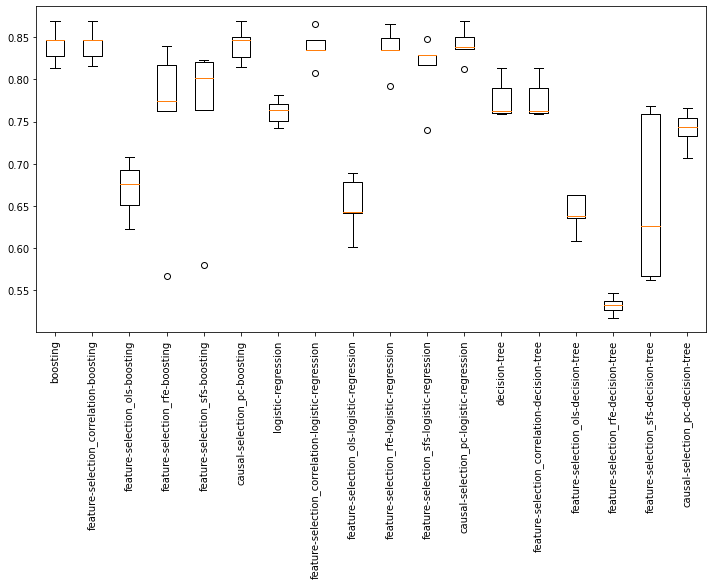

In [17]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### GES

In [18]:
causal_model = "ges"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
selection_models = ["correlation", "ols", "rfe", "sfs"]
selection_models = [[f"feature-selection_{selection_model}-{predictive_model}" for selection_model in selection_models] for predictive_model in predictive_models]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]
names = sum([ls if isinstance(ls, list) else [ls] for ls in sum(list(zip(predictive_models, selection_models, names)), ())], [])
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.
finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.
finished loading results fro

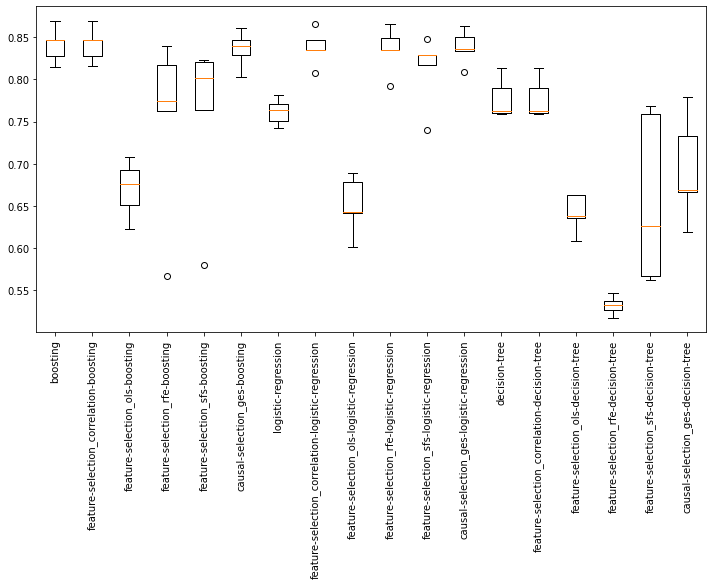

In [19]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### LiNGAM

In [20]:
causal_model = "lingam"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
selection_models = ["correlation", "ols", "rfe", "sfs"]
selection_models = [[f"feature-selection_{selection_model}-{predictive_model}" for selection_model in selection_models] for predictive_model in predictive_models]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]
names = sum([ls if isinstance(ls, list) else [ls] for ls in sum(list(zip(predictive_models, selection_models, names)), ())], [])
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.
finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.
finished loading results 

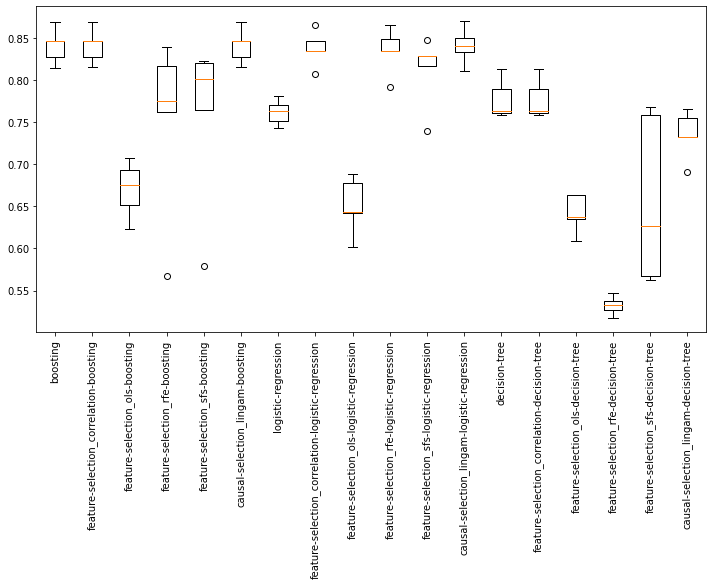

In [21]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### NOTEARS

In [22]:
causal_model = "notears"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
selection_models = ["correlation", "ols", "rfe", "sfs"]
selection_models = [[f"feature-selection_{selection_model}-{predictive_model}" for selection_model in selection_models] for predictive_model in predictive_models]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]
names = sum([ls if isinstance(ls, list) else [ls] for ls in sum(list(zip(predictive_models, selection_models, names)), ())], [])
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.
finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.
finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.
finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.
finished loading results from ../out/grid-search/causal-selection_notears-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.
finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.
finished loading results

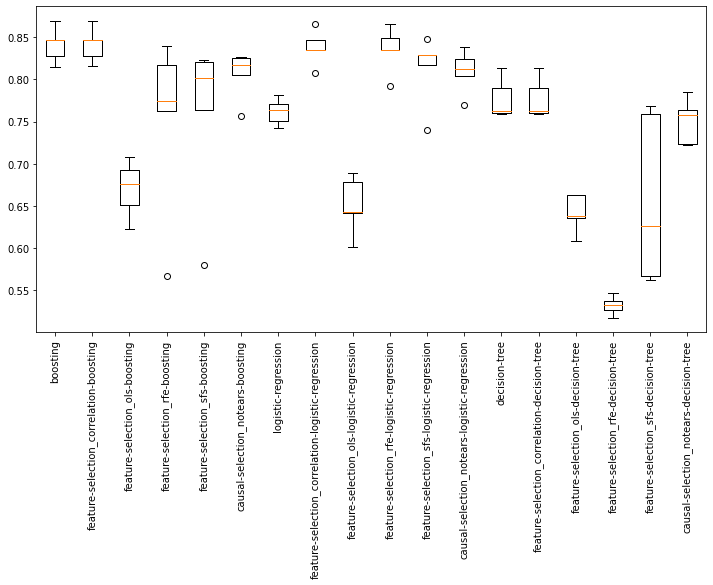

In [23]:
plt.figure(figsize=(12, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

## Interpretability

### DAGs

#### PC

![dag](../out/img/dag_causal-selection_pc-boosting.png)

![dag](../out/img/dag_causal-selection_pc-decision-tree.png)

![dag](../out/img/dag_causal-selection_pc-logistic-regression.png)

#### GES

![dag](../out/img/dag_causal-selection_ges-boosting.png)

![dag](../out/img/dag_causal-selection_ges-decision-tree.png)

![dag](../out/img/dag_causal-selection_ges-logistic-regression.png)

#### LiNGAM

![dag](../out/img/dag_causal-selection_lingam-boosting.png)

![dag](../out/img/dag_causal-selection_lingam-decision-tree.png)

![dag](../out/img/dag_causal-selection_lingam-logistic-regression.png)

#### NOTEARS

![dag](../out/img/dag_causal-selection_notears-boosting.png)

![dag](../out/img/dag_causal-selection_notears-decision-tree.png)

![dag](../out/img/dag_causal-selection_notears-logistic-regression.png)

#### CASTLE

![dag](../out/img/dag_castle.png)

### Feature Selection: Selected Features

In [24]:
features_json = utils.get_files("../out/selected-features/")

In [25]:
names = [
    "feature-selection_correlation-boosting",
    "feature-selection_correlation-decision-tree",
    "feature-selection_correlation-logistic-regression",
    "feature-selection_ols-boosting",
    "feature-selection_ols-decision-tree",
    "feature-selection_ols-logistic-regression",
    "feature-selection_rfe-boosting",
    "feature-selection_rfe-decision-tree",
    "feature-selection_rfe-logistic-regression",
    "feature-selection_sfs-boosting",
    "feature-selection_sfs-decision-tree",
    "feature-selection_sfs-logistic-regression",
]
selected_features = {name: utils.json.load(features_json[f"{name}.json"]) for name in names}

In [26]:
for model, _selected_features in selected_features.items():
    print(f"{model}: {len(_selected_features)} / 27 features selected")
    print(f"-"*80)
    print(sorted(_selected_features), "\n")

feature-selection_correlation-boosting: 27 / 27 features selected
--------------------------------------------------------------------------------
['cd_msa', 'channel', 'cltv', 'cnt_borr', 'cnt_units', 'dti', 'fico', 'flag_fthb', 'flag_sc', 'int_only_ind', 'int_rt', 'loan_purpose', 'ltv', 'mi_pct', 'occpy_sts', 'orig_loan_term', 'orig_upb', 'pgrm_ind', 'ppmt_pnlty', 'prod_type', 'prop_type', 'prop_val_meth', 'rel_ref_ind', 'seller_name', 'servicer_name', 'st', 'zipcode'] 

feature-selection_correlation-decision-tree: 27 / 27 features selected
--------------------------------------------------------------------------------
['cd_msa', 'channel', 'cltv', 'cnt_borr', 'cnt_units', 'dti', 'fico', 'flag_fthb', 'flag_sc', 'int_only_ind', 'int_rt', 'loan_purpose', 'ltv', 'mi_pct', 'occpy_sts', 'orig_loan_term', 'orig_upb', 'pgrm_ind', 'ppmt_pnlty', 'prod_type', 'prop_type', 'prop_val_meth', 'rel_ref_ind', 'seller_name', 'servicer_name', 'st', 'zipcode'] 

feature-selection_correlation-logistic-

### Markov Blankets

In [27]:
blankets_json = utils.get_files("../out/markov-blankets/")
blankets_json

{'causal-selection_lingam-boosting.json': '../out/markov-blankets/causal-selection_lingam-boosting.json',
 'causal-selection_ges-logistic-regression.json': '../out/markov-blankets/causal-selection_ges-logistic-regression.json',
 'causal-selection_lingam-decision-tree.json': '../out/markov-blankets/causal-selection_lingam-decision-tree.json',
 'causal-selection_ges-decision-tree.json': '../out/markov-blankets/causal-selection_ges-decision-tree.json',
 'causal-selection_notears-decision-tree.json': '../out/markov-blankets/causal-selection_notears-decision-tree.json',
 'castle.json': '../out/markov-blankets/castle.json',
 'causal-selection_ges-boosting.json': '../out/markov-blankets/causal-selection_ges-boosting.json',
 'causal-selection_notears-boosting.json': '../out/markov-blankets/causal-selection_notears-boosting.json',
 'causal-selection_pc-logistic-regression.json': '../out/markov-blankets/causal-selection_pc-logistic-regression.json',
 'causal-selection_notears-logistic-regression

In [28]:
names = [
    "causal-selection_pc-boosting", 
    "causal-selection_pc-decision-tree",
    "causal-selection_pc-logistic-regression",
    "causal-selection_ges-boosting", 
    "causal-selection_ges-decision-tree",
    "causal-selection_ges-logistic-regression",
    "causal-selection_lingam-boosting", 
    "causal-selection_lingam-decision-tree",
    "causal-selection_lingam-logistic-regression",
    "causal-selection_notears-boosting", 
    "causal-selection_notears-decision-tree",
    "causal-selection_notears-logistic-regression",
    "castle"
]

blankets = {name: utils.json.load(blankets_json[f"{name}.json"]) for name in names}
causal_features = {model: utils.feature_selection.get_causal_features(markov_blanket=blanket) for model, blanket in blankets.items()}

#### PC

In [29]:
causal_model = "pc"
for model, blanket in blankets.items():
    if causal_model in model:
        print(f"{model}:")
        print(f"-"*50)
        for k, v in blanket.items():
            print(f"{k}:{' '*(10-len(k))}{v}")
        print("")


causal-selection_pc-boosting:
--------------------------------------------------
y:         ['TARGET']
parents:   ['dti']
spouses:   ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'channel', 'st', 'prop_type', 'zipcode', 'loan_purpose', 'orig_loan_term', 'seller_name', 'pgrm_ind']
children:  ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'int_rt', 'st', 'zipcode', 'cnt_borr', 'servicer_name', 'pgrm_ind']

causal-selection_pc-decision-tree:
--------------------------------------------------
y:         ['TARGET']
parents:   ['dti']
spouses:   ['fico', 'cd_msa', 'mi_pct', 'cnt_units', 'occpy_sts', 'dti', 'orig_upb', 'ltv', 'int_rt', 'channel', 'prop_type', 'zipcode', 'orig_loan_term', 'seller_name']
children:  ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'int_rt', 'st', 'zipcode', 'cnt_borr', 'servicer_name', 'pgrm_ind']

causal-selection_pc-logistic-regression:
--------------------------------------------------
y:         ['TARGET'

#### GES

In [30]:
causal_model = "ges"
for model, blanket in blankets.items():
    if causal_model in model:
        print(f"{model}:")
        print(f"-"*50)
        for k, v in blanket.items():
            print(f"{k}:{' '*(10-len(k))}{v}")
        print("")


causal-selection_ges-boosting:
--------------------------------------------------
y:         ['TARGET']
parents:   ['fico', 'flag_fthb', 'cd_msa', 'dti', 'orig_upb', 'int_rt', 'channel', 'st', 'zipcode', 'cnt_borr', 'servicer_name', 'pgrm_ind']
spouses:   []
children:  []

causal-selection_ges-decision-tree:
--------------------------------------------------
y:         ['TARGET']
parents:   ['fico', 'flag_fthb', 'cd_msa', 'dti', 'orig_upb', 'int_rt', 'channel', 'st', 'zipcode', 'cnt_borr', 'servicer_name', 'pgrm_ind']
spouses:   []
children:  []

causal-selection_ges-logistic-regression:
--------------------------------------------------
y:         ['TARGET']
parents:   ['fico', 'flag_fthb', 'cd_msa', 'dti', 'orig_upb', 'int_rt', 'channel', 'st', 'zipcode', 'cnt_borr', 'servicer_name', 'pgrm_ind']
spouses:   []
children:  []



#### LiNGAM

In [31]:
causal_model = "lingam"
for model, blanket in blankets.items():
    if causal_model in model:
        print(f"{model}:")
        print(f"-"*50)
        for k, v in blanket.items():
            print(f"{k}:{' '*(10-len(k))}{v}")
        print("")


causal-selection_lingam-boosting:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'channel', 'st', 'prop_type', 'zipcode', 'loan_purpose', 'orig_loan_term', 'cnt_borr', 'seller_name']
children:  ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'dti', 'orig_upb', 'int_rt', 'channel', 'st', 'zipcode', 'orig_loan_term', 'cnt_borr', 'seller_name', 'servicer_name', 'pgrm_ind']

causal-selection_lingam-decision-tree:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   []
children:  ['fico', 'servicer_name']

causal-selection_lingam-logistic-regression:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'cd_msa', 'cltv', 'ltv', 'int_rt', 'channel', 'st', 'loan_purpose', 'orig_loan_term', 'cnt_borr', 'seller_name', 'flag_sc']
children:  ['fi

#### NOTEARS

In [32]:
causal_model = "notears"
for model, blanket in blankets.items():
    if causal_model in model:
        print(f"{model}:")
        print(f"-"*50)
        for k, v in blanket.items():
            print(f"{k}:{' '*(10-len(k))}{v}")
        print("")


causal-selection_notears-boosting:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'channel', 'seller_name']
children:  ['fico', 'zipcode', 'servicer_name']

causal-selection_notears-decision-tree:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'channel', 'seller_name']
children:  ['fico', 'zipcode', 'servicer_name']

causal-selection_notears-logistic-regression:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'channel', 'seller_name']
children:  ['fico', 'zipcode', 'servicer_name']



#### CASTLE

In [33]:
causal_model = "castle"
for model, blanket in blankets.items():
    if causal_model in model:
        print(f"{model}:")
        print(f"-"*50)
        for k, v in blanket.items():
            print(f"{k}:{' '*(10-len(k))}{v}")
        print("")


castle:
--------------------------------------------------
y:         ['TARGET']
parents:   []
spouses:   ['fico', 'flag_fthb', 'cd_msa', 'mi_pct', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'channel', 'st', 'prop_type', 'zipcode', 'loan_purpose', 'orig_loan_term', 'cnt_borr', 'seller_name', 'servicer_name', 'rel_ref_ind']
children:  ['flag_fthb', 'servicer_name', 'pgrm_ind']



In [34]:
all_features = list(utils.csv.read("../data/features_test_no-dummies.csv").columns)
all_features = [feature for feature in all_features if feature not in ["id_loan"]]

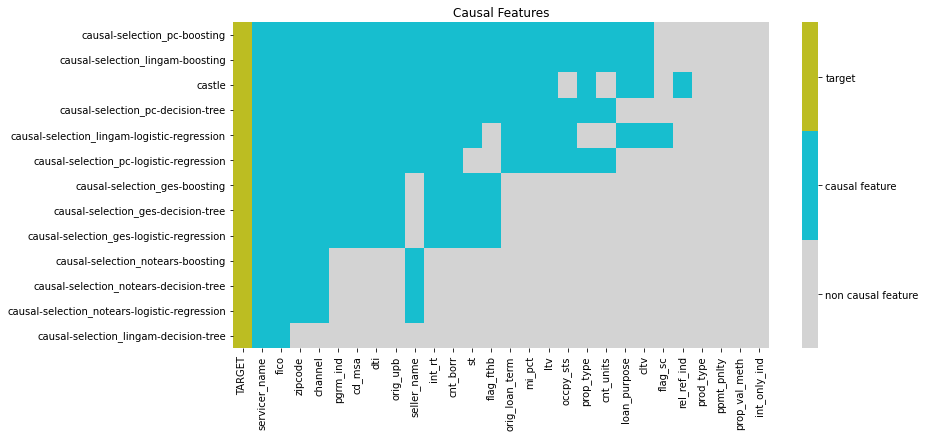

In [35]:
n=3
plt.figure(figsize=(12, 6))

features = pd.DataFrame(columns=all_features)
for model, _selected_features in causal_features.items():
    for feature in _selected_features:
        features.loc[model, feature] = 1
features["TARGET"] = 2
cols = list(features.fillna(0).sum().sort_values(ascending=False).index)
features = features.loc[:, cols]
features = features.loc[features.fillna(0).sum(axis=1).sort_values(ascending=False).index, :]


ax = sns.heatmap(features.fillna(0), cmap=["lightgray", "tab:cyan", "tab:olive"])
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(["non causal feature", "causal feature", 'target'])
plt.title("Causal Features")
plt.savefig("../out/img/causal-features.png", bbox_inches='tight')
plt.show()

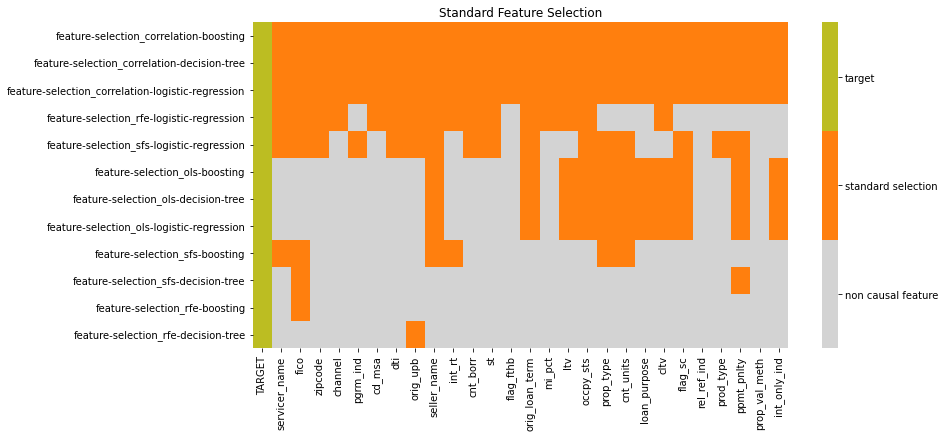

In [36]:
n=3
plt.figure(figsize=(12, 6))

features = pd.DataFrame(columns=all_features)
for model, _selected_features in selected_features.items():
    for feature in _selected_features:
        features.loc[model, feature] = 1
features["TARGET"] = 2
features = features.loc[:, cols]
features = features.loc[features.fillna(0).sum(axis=1).sort_values(ascending=False).index, :]


ax = sns.heatmap(features.fillna(0), cmap=["lightgray", "tab:orange", "tab:olive"])
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(["non causal feature", "standard selection", 'target'])
plt.title("Standard Feature Selection")
plt.savefig("../out/img/causal-features.png", bbox_inches='tight')
plt.show()

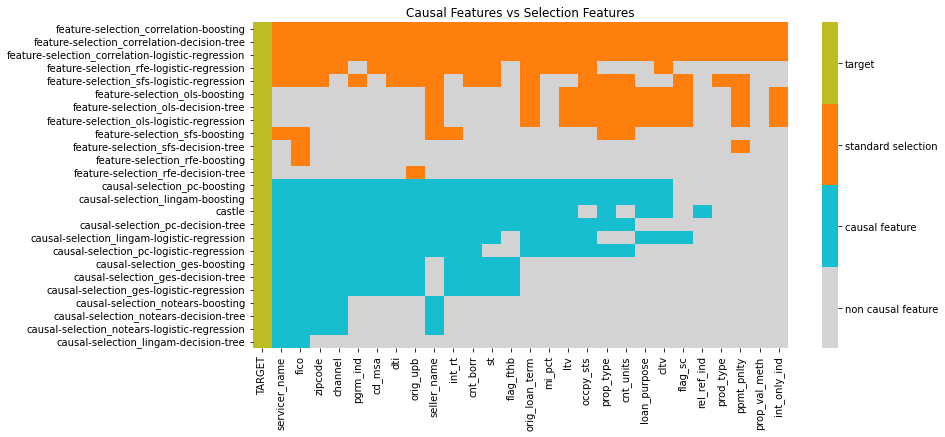

In [37]:
n=4
plt.figure(figsize=(12, 6))

features = pd.DataFrame(columns=all_features)
for model, _selected_features in selected_features.items():
    for feature in _selected_features:
        features.loc[model, feature] = 2
for model, _selected_features in causal_features.items():
    for feature in _selected_features:
        features.loc[model, feature] = 1
features["TARGET"] = 3
index = list(features.loc[selected_features.keys(), :].fillna(0).sum(axis=1).sort_values(ascending=False).index) + \
        list(features.loc[causal_features.keys(), :].fillna(0).sum(axis=1).sort_values(ascending=False).index)
features = features.loc[:, cols]
features = features.loc[index, :]


ax = sns.heatmap(features.fillna(0), cmap=["lightgray", "tab:cyan", "tab:orange", "tab:olive"])
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(["non causal feature", "causal feature", "standard selection", 'target'])
plt.title("Causal Features vs Selection Features")
plt.savefig("../out/img/features-comparison.png", bbox_inches='tight')
plt.show()

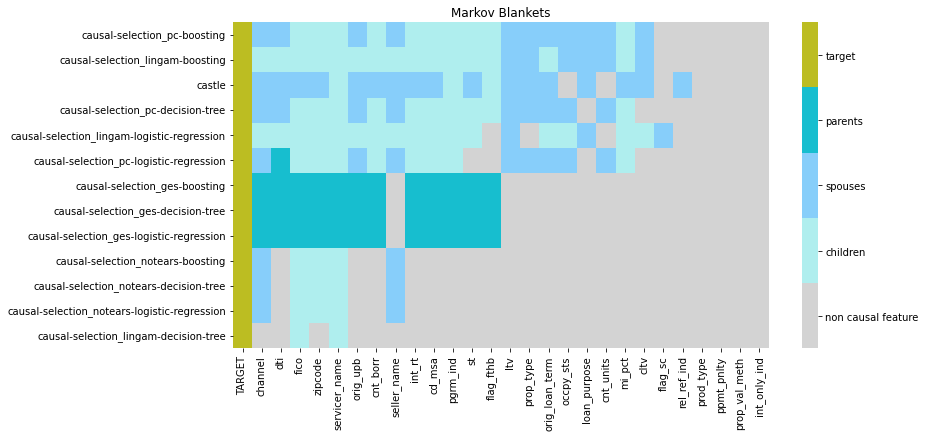

In [38]:
n=5
plt.figure(figsize=(12, 6))

features = pd.DataFrame(columns=all_features)
for model, blanket in blankets.items():
    for group, _features in blanket.items():
        if group == "parents":
            for f in _features:
                features.loc[model, f] = 3
        if group == "spouses":
            for f in _features:
                features.loc[model, f] = 2
        if group == "children":
            for f in _features:
                features.loc[model, f] = 1
features["TARGET"] = 4
features = features.loc[:, list(features.fillna(0).sum().sort_values(ascending=False).index)]
features = features.loc[features.where(features.isna(), 1).fillna(0).sum(axis=1).sort_values(ascending=False).index, :]

ax = sns.heatmap(features.fillna(0), cmap=["lightgray", "paleturquoise", "lightskyblue", "tab:cyan", "tab:olive"])
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(["non causal feature", "children", "spouses", "parents", 'target'])
plt.title("Markov Blankets")
plt.savefig("../out/img/markov-blankets.png", bbox_inches='tight')
plt.show()

## Training Stats

In [39]:
stats_json = utils.get_files("../out/training-stats/")
names = [
    "boosting", 
    "decision-tree",
    "logistic-regression",
    "feature-selection_correlation-boosting",
    "feature-selection_correlation-decision-tree",
    "feature-selection_correlation-logistic-regression",
    "feature-selection_ols-boosting",
    "feature-selection_ols-decision-tree",
    "feature-selection_ols-logistic-regression",
    "feature-selection_rfe-boosting",
    "feature-selection_rfe-decision-tree",
    "feature-selection_rfe-logistic-regression",
    "feature-selection_sfs-boosting",
    "feature-selection_sfs-decision-tree",
    "feature-selection_sfs-logistic-regression",
    "causal-selection_pc-boosting", 
    "causal-selection_pc-decision-tree",
    "causal-selection_pc-logistic-regression",
    "causal-selection_ges-boosting", 
    "causal-selection_ges-decision-tree",
    "causal-selection_ges-logistic-regression",
    "causal-selection_lingam-boosting", 
    "causal-selection_lingam-decision-tree",
    "causal-selection_lingam-logistic-regression",
    "causal-selection_notears-boosting", 
    "causal-selection_notears-decision-tree",
    "causal-selection_notears-logistic-regression",
    "castle"
]
stats = {model: utils.json.load(stats_json[f"{model}.json"]) for model in names}

In [40]:
# creating dataframe
statistics = pd.DataFrame()
for model, _stats in stats.items():
    for col in ["train_score", "h_value", "time", "shapes"]:
        statistics.loc[model, col] = str(_stats.get(col, "null"))
for col in statistics.columns:
    statistics[col] = statistics[col].apply(lambda string: json.loads(string.replace("'", '"')))
# preparing time and shape stats
for col in ["time", "shapes"]:
    for sub in ["selection", "causal", "predictive"]:
        statistics[f"{col}_{sub}"] = statistics[col].apply(lambda i: i.get(sub, None) if isinstance(i, dict) else None)
statistics["time"] = statistics["time"].apply(lambda i: i["total"] if isinstance(i, dict) else i)
statistics["shapes"] = statistics["shapes"].apply(lambda i: None if isinstance(i, dict) else i)
for col in [col for col in statistics.columns if "time" in col]:
    statistics[f"{col}_sec"] = statistics[col].apply(lambda ls: float(ls[1]) if ls is not None else None)
    statistics[f"{col}"] = statistics[col].apply(lambda ls: ls[0] if ls is not None else None)
for col in [col for col in statistics.columns if "shapes" in col]:
    statistics[f"X_train_{col}"] = statistics[col].apply(lambda ls: ls[0] if ls is not None else None)
    statistics[f"y_train_{col}"] = statistics[col].apply(lambda ls: ls[-1] if ls is not None else None)
    statistics = statistics.drop(col, axis=1)
statistics["n_features"] = statistics["X_train_shapes_predictive"].apply(lambda shape: int(shape[1]) if shape is not None else shape)
statistics["n_features"] = statistics.apply(lambda row: row["X_train_shapes"][1] if row["X_train_shapes"] is not None else row["n_features"], axis=1)
statistics = statistics.fillna(np.nan)
utils.csv.dump(statistics, "../out/training-stats/stats.csv",verbose=1)

stored dataframe to ../out/training-stats/stats.csv.


In [41]:
statistics.fillna("-").round(3)

,train_score,h_value,time,time_selection,time_causal,time_predictive,time_sec,time_selection_sec,time_causal_sec,time_predictive_sec,X_train_shapes,y_train_shapes,X_train_shapes_selection,y_train_shapes_selection,X_train_shapes_causal,y_train_shapes_causal,X_train_shapes_predictive,y_train_shapes_predictive,n_features
boosting,0.906,-,00:12,-,-,-,12.306,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
decision-tree,0.736,-,00:00,-,-,-,0.035,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
logistic-regression,0.878,-,00:02,-,-,-,2.360,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
feature-selection_correlation-boosting,0.906,-,00:12,-,-,00:12,12.230,-,-,12.05395,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
feature-selection_correlation-decision-tree,0.875,-,00:00,-,-,00:00,0.435,-,-,0.256278,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
feature-selection_correlation-logistic-regression,0.879,-,00:01,-,-,00:01,1.519,-,-,1.346638,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
feature-selection_ols-boosting,0.711,-,00:01,-,-,00:01,1.850,-,-,1.749323,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
feature-selection_ols-decision-tree,0.654,-,00:00,-,-,00:00,0.142,-,-,0.033573,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
feature-selection_ols-logistic-regression,0.639,-,00:00,-,-,00:00,0.607,-,-,0.462451,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
feature-selection_rfe-boosting,0.773,-,08:13,-,-,00:02,493.925,-,-,2.894361,-,-,"[123823, 27]",[123823],-,-,"[123823, 1]",[123823],1.0
